In [1]:
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from  scipy.stats import chi2_contingency

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

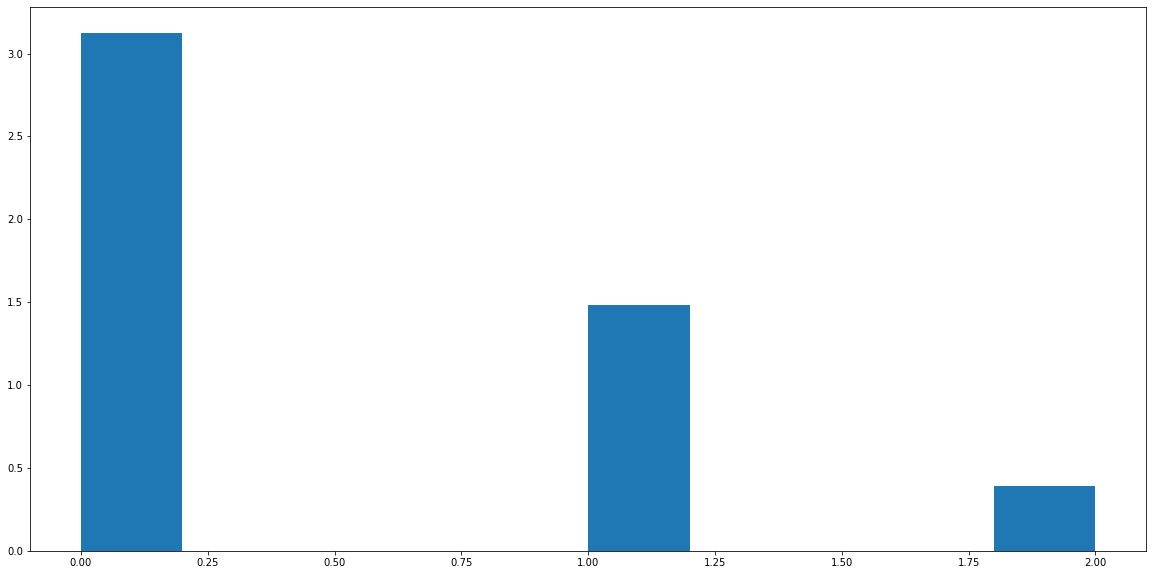

In [3]:
M = 9000
L = 0.5
second_distribution_all_numbers = np.random.poisson(L, M)
second_distribution = np.fromiter((x for x in second_distribution_all_numbers if x <= 2), dtype=second_distribution_all_numbers.dtype)
count, bins, ignored = plt.hist(second_distribution, density=True)
plt.show()

In [4]:
def counter(start_x, end_x, lambda_):
    time_array = np.array([start_x])
    while (time_array[-1] < end_x):
        time_array = np.append(time_array, [time_array[-1] - np.log(np.random.uniform(0, 1, 1))[0]/lambda_])
    return time_array.size - 1

def is_similar(start_x, end_x, lambda_, size):
    return chi2_contingency([np.full(size, lambda_*(end_x - start_x)), np.array([counter(start_x, end_x, lambda_) for _ in range(size)])])

The theoretical chi-squared probability of calculated integral of lambda in this time interval compared with amount of events is: 0.9999999973
This means that this destribution is simmilar to ours


<AxesSubplot:ylabel='Count'>

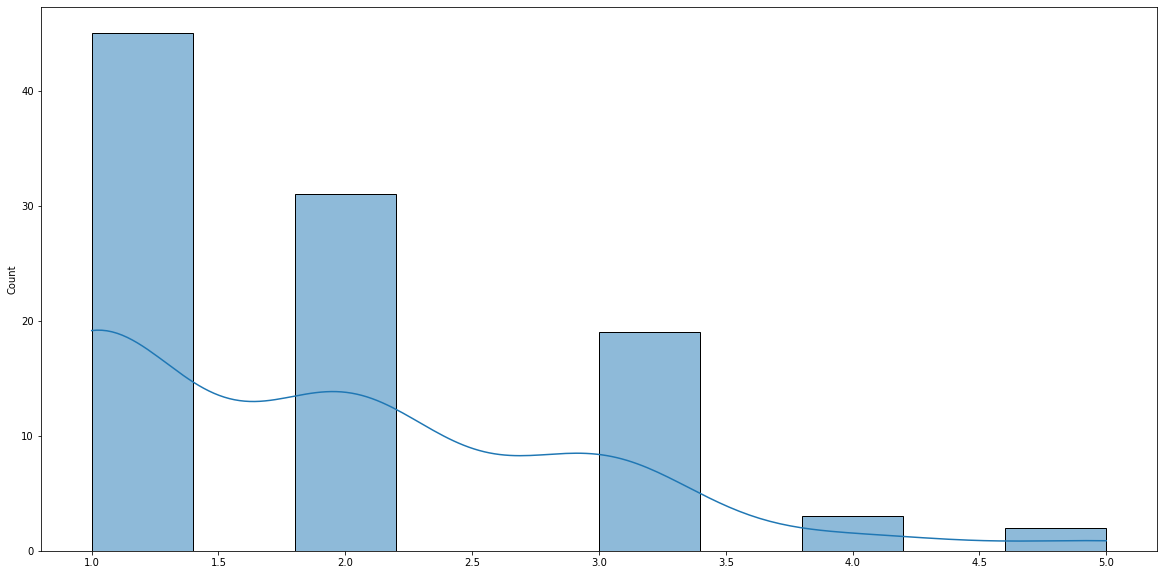

In [7]:
print(f"The theoretical chi-squared probability of calculated integral of lambda in this time interval compared with amount of events is: {is_similar(0, 1.5, 5, 100)[1]:.10f}\nThis means that this destribution is simmilar to ours")
sns.histplot(([counter(0, 2, 0.5) for _ in range(100)]), kde=True)